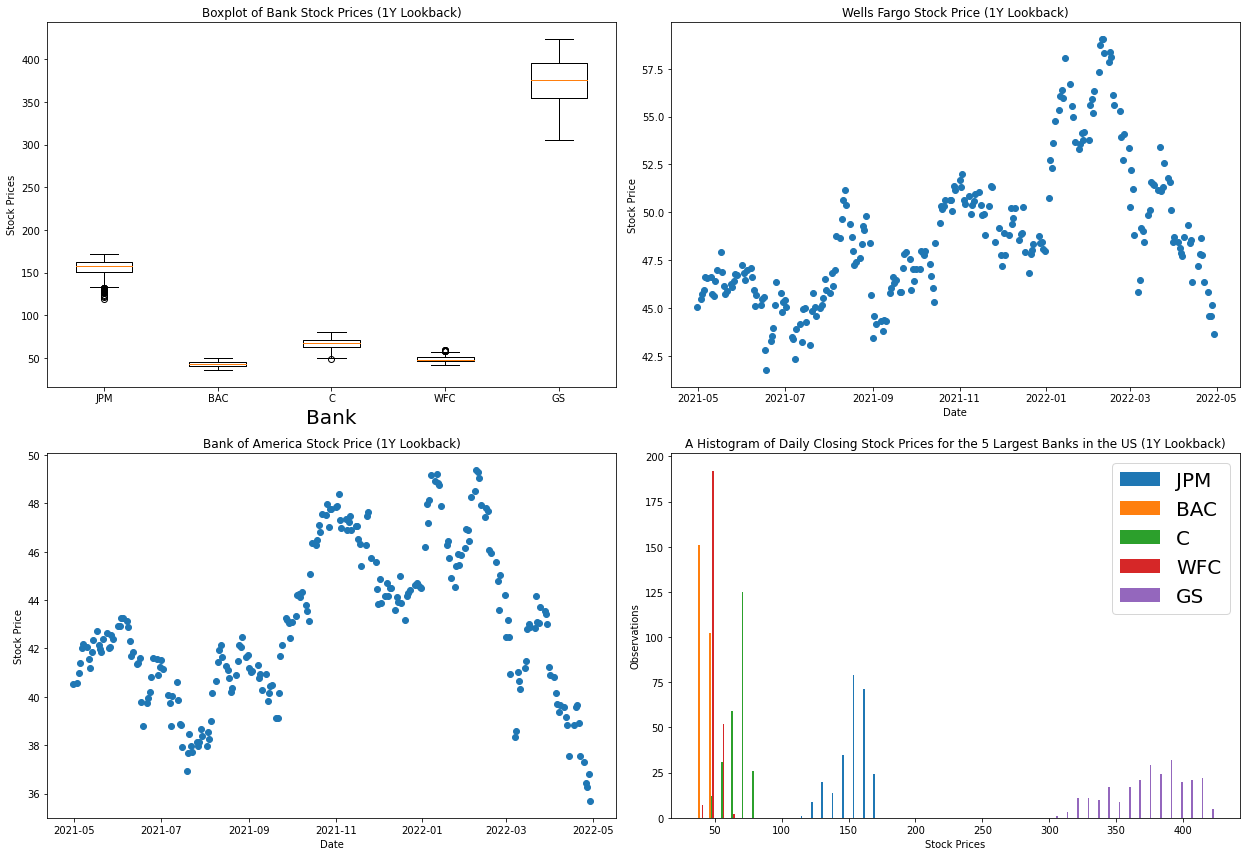

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#import boto3

IEX_API_Key = 'pk_d0f9808ce6e74245833c3572ae6d4420'

tickers = [
            'JPM',
            'BAC',
            'C',
            'WFC',
            'GS',
            ]

#Create an empty string called `ticker_string` that we'll add tickers and commas to
ticker_string = ''

#Loop through every element of `tickers` and add them and a comma to ticker_string
for ticker in tickers:
    ticker_string += ticker
    ticker_string += ','
    
#Drop the last comma from `ticker_string`
ticker_string = ticker_string[:-1]

#Create the endpoint and years strings
endpoints = 'chart'
years = '1'

#Interpolate the endpoint strings into the HTTP_request string
HTTP_request = f'https://cloud.iexapis.com/stable/stock/market/batch?symbols={ticker_string}&types={endpoints}&range={years}y&cache=true&token={IEX_API_Key}'

#Send the HTTP request to the IEX Cloud API and store the response in a pandas DataFrame
bank_data = pd.read_json(HTTP_request)

#Create an empty list that we will append pandas Series of stock price data into
series_list = []

#Loop through each of our tickers and parse a pandas Series of their closing prices over the last 5 years
for ticker in tickers:
    series_list.append(pd.DataFrame(bank_data[ticker]['chart'])['close'])

#Add in a column of dates
series_list.append(pd.DataFrame(bank_data['JPM']['chart'])['date'])

#Copy the 'tickers' list from earlier in the script, and add a new element called 'Date'. 
#These elements will be the column names of our pandas DataFrame later on.
column_names = tickers.copy()
column_names.append('Date')

#Concatenate the pandas Series together into a single DataFrame
bank_data = pd.concat(series_list, axis=1)

#Name the columns of the DataFrame and set the 'Date' column as the index
bank_data.columns = column_names
bank_data.set_index('Date', inplace = True)

################################################
################################################
#Create subplots in Python
################################################
################################################

########################
#Subplot 1
########################
plt.figure(figsize = (18,12))

plt.subplot(2,2,1)

#Generate the boxplot
plt.boxplot(bank_data.transpose())

#Add titles to the chart and axes
plt.title('Boxplot of Bank Stock Prices (1Y Lookback)')
plt.xlabel('Bank', fontsize = 20)
plt.ylabel('Stock Prices')

#Add labels to each individual boxplot on the canvas
ticks = range(1, len(bank_data.columns)+1)
labels = list(bank_data.columns)
plt.xticks(ticks,labels)

########################
#Subplot 2
########################
plt.subplot(2,2,2)

#Create the x-axis data
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]

#Create the y-axis data
WFC_stock_prices =  bank_data['WFC']

#Generate the scatterplot
plt.scatter(dates, WFC_stock_prices)

#Add titles to the chart and axes
plt.title("Wells Fargo Stock Price (1Y Lookback)")
plt.ylabel("Stock Price")
plt.xlabel("Date")

########################
#Subplot 3
########################
plt.subplot(2,2,3)

#Create the x-axis data
dates = bank_data.index.to_series()
dates = [pd.to_datetime(d) for d in dates]

#Create the y-axis data
BAC_stock_prices =  bank_data['BAC']

#Generate the scatterplot
plt.scatter(dates, BAC_stock_prices)

#Add titles to the chart and axes
plt.title("Bank of America Stock Price (1Y Lookback)")
plt.ylabel("Stock Price")
plt.xlabel("Date")

########################
#Subplot 4
########################
plt.subplot(2,2,4)

#Generate the histogram
plt.hist(bank_data.transpose(), bins = 50)

#Add a legend to the histogram
plt.legend(bank_data.columns,fontsize=20)

#Add titles to the chart and axes
plt.title("A Histogram of Daily Closing Stock Prices for the 5 Largest Banks in the US (1Y Lookback)")
plt.ylabel("Observations")
plt.xlabel("Stock Prices")
plt.tight_layout()
plt.savefig('bank_data.png')

